In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Задание 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

#### Задание 2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

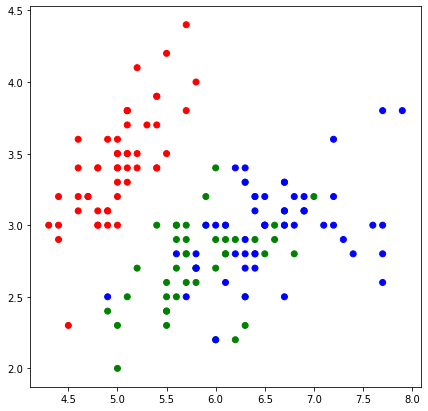

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def weights(w, q, i, distance):
    
    # реализуем расчёт веса в зависимости от номера соседа
    if w == 'neighbor_weight':
        return q ** i
    
    # реализуем расчёт веса в зависимости от расстояния до соседа
    elif w == 'dist_weight':
        return q ** distance
    
    else:
        return 1

In [7]:
def knn(x_train, y_train, x_test, k, w, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # сортируем список и среди первых k элементов подсчитаем частоту появления разных классов (с индексом),
        # возвращаем классы, учитывая веса
        for i, d in enumerate(sorted(test_distances)[0:k]):
            classes[d[1]] += weights(w, q, i, d[0])
            
        # записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [9]:
def get_graph(X_train, y_train, k, w, q):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, w, q)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

#### Проверим точность. Сперва по соседям:

При k = 1:

In [10]:
k = 1
q = 0.5
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1 и добавлении весов для соседей в зависимости от номера соседа: 0.667


In [11]:
k = 1
q = 0.75
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1 и добавлении весов для соседей в зависимости от номера соседа: 0.667


In [12]:
k = 1
q = 1
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1 и добавлении весов для соседей в зависимости от номера соседа: 0.667


При k = 3:

In [13]:
k = 3
q = 0.5
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3 и добавлении весов для соседей в зависимости от номера соседа: 0.667


In [14]:
k = 3
q = 0.75
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3 и добавлении весов для соседей в зависимости от номера соседа: 0.733


In [15]:
k = 3
q = 1
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3 и добавлении весов для соседей в зависимости от номера соседа: 0.733


При k = 5:

In [16]:
k = 5
q = 0.5
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5 и добавлении весов для соседей в зависимости от номера соседа: 0.667


In [17]:
k = 5
q = 0.75
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5 и добавлении весов для соседей в зависимости от номера соседа: 0.733


In [18]:
k = 5
q = 1
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5 и добавлении весов для соседей в зависимости от номера соседа: 0.867


При k = 10:

In [19]:
k = 10
q = 0.5
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10 и добавлении весов для соседей в зависимости от номера соседа: 0.667


In [20]:
k = 10
q = 0.75
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10 и добавлении весов для соседей в зависимости от номера соседа: 0.767


In [21]:
k = 10
q = 1
w = 'neighbor_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от номера соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10 и добавлении весов для соседей в зависимости от номера соседа: 0.833


Видим, что при k = 5 и q = 1 самый высокий результат (0.867).

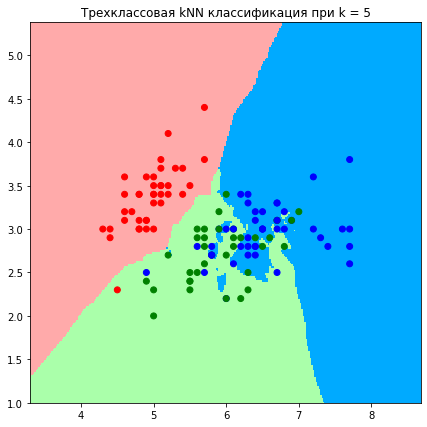

In [22]:
get_graph(X_train, y_train, k = 5, w = 'neighbor_weight', q = 1)

#### Теперь расстояние:

При k = 1:

In [23]:
k = 1
q = 0.5
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.667


In [24]:
k = 1
q = 0.75
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.667


In [25]:
k = 1
q = 1
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.667


При k = 3:

In [26]:
k = 3
q = 0.5
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.733


In [27]:
k = 3
q = 0.75
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.733


In [28]:
k = 3
q = 1
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.733


При k = 5:

In [29]:
k = 5
q = 0.5
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.867


In [30]:
k = 5
q = 0.75
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.867


In [31]:
k = 5
q = 1
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.867


При k = 10:

In [32]:
k = 10
q = 0.5
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.867


In [33]:
k = 10
q = 0.75
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.867


In [34]:
k = 10
q = 1
w = 'dist_weight'

y_pred = knn(X_train, y_train, X_test, k, w, q)

print(f'Точность алгоритма при k = {k} и добавлении весов для соседей в зависимости от расстояния до соседа: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10 и добавлении весов для соседей в зависимости от расстояния до соседа: 0.833


Видим, что при k = 5 и k = 10 самый высокий результат (0.867). Но точность более устойчивая при k = 5, то есть не снижается при изменении q. При k = 10, если выбрать q = 1, точность снижается.

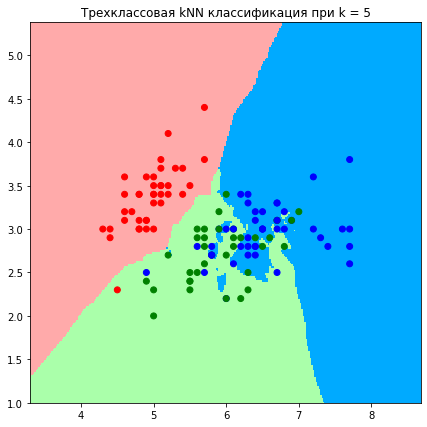

In [35]:
get_graph(X_train, y_train, k = 5, w = 'dist_weight', q = 1)

#### Задание 3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [36]:
neighbors = [i for i in range(1, 11)]
w = 'dist_weight'
q = 1
acc = []

for k in neighbors:
    y_pred = knn(X_train, y_train, X_test, k, w, q)
    acc.append(accuracy(y_pred, y_test))

In [37]:
accuracy_max = np.max(acc)
accuracy_max

0.8666666666666667

In [38]:
best_k = acc.index(np.max(acc)) + 1
best_k

5

Можно сделать вывод, что оптимальным значением числа соседей будет 5, так как точность = 0.867. В целом, это подтвердилось ранее.